In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, models
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

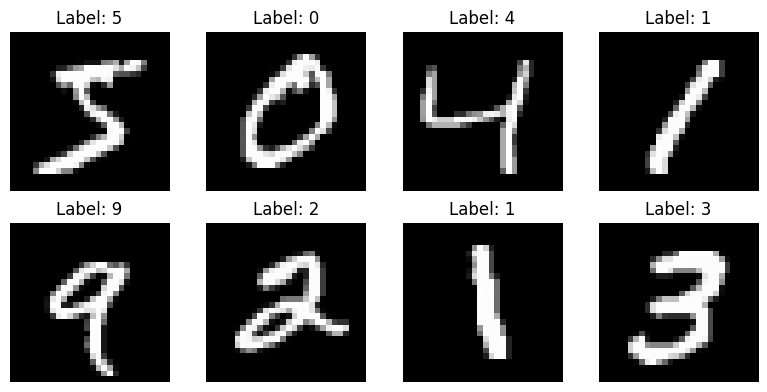

In [3]:
# sample images from the training set
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
# Normalize pixel values to [0,1] and add channel axis (channels_last)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# reshape to (N, 28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

# print shapes to confirm
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


In [5]:
def build_model():
    model = models.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_model()
model.summary()


d:\Github\Simple Image Classifier\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


422/422 - 7s - 17ms/step - accuracy: 0.9259 - loss: 0.2480 - val_accuracy: 0.9790 - val_loss: 0.0706
Epoch 2/10


422/422 - 6s - 14ms/step - accuracy: 0.9765 - loss: 0.0752 - val_accuracy: 0.9880 - val_loss: 0.0429
Epoch 3/10


422/422 - 6s - 13ms/step - accuracy: 0.9832 - loss: 0.0550 - val_accuracy: 0.9908 - val_loss: 0.0357
Epoch 4/10
422/422 - 6s - 13ms/step - accuracy: 0.9851 - loss: 0.0464 - val_accuracy: 0.9908 - val_loss: 0.0326
Epoch 5/10


422/422 - 6s - 14ms/step - accuracy: 0.9878 - loss: 0.0377 - val_accuracy: 0.9910 - val_loss: 0.0335
Epoch 6/10
422/422 - 6s - 13ms/step - accuracy: 0.9899 - loss: 0.0317 - val_accuracy: 0.9905 - val_loss: 0.0316
Epoch 7/10
422/422 - 6s - 15ms/step - accuracy: 0.9904 - loss: 0.0292 - val_accuracy: 0.9910 - val_loss: 0.0331
Epoch 8/10
422/422 - 6s - 13ms/step - accuracy: 0.9917 - loss: 0.0254 - val_accuracy: 0.9898 - val_loss: 0.0370


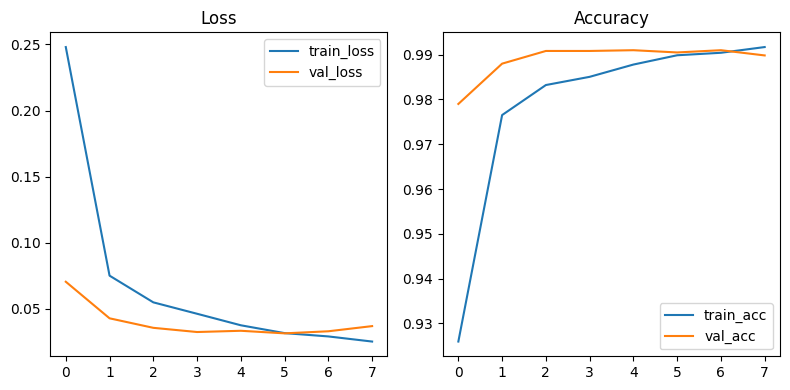


Test accuracy: 0.9906, Test loss: 0.0289
Best model saved to: models/mnist_cnn.h5


In [6]:
# callbacks
os.makedirs("models", exist_ok=True)
checkpoint = ModelCheckpoint("models/mnist_cnn.h5", save_best_only=True, monitor="val_accuracy")
early = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)

# train
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    callbacks=[checkpoint, early],
    verbose=2
)

# plot training curves
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy'); plt.legend()
plt.tight_layout()
plt.show()

# final evaluation on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

# model saved path
print("Best model saved to: models/mnist_cnn.h5")
